In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [18]:
import os.path
def path_base(base_name):
    current_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
    print(current_dir)
    data_dir = current_dir.replace('notebook','data')
    print(data_dir)
    data_base = data_dir + '\\' + base_name
    print(data_base)
    return data_base

In [19]:
base = pd.read_csv(path_base('db_passageiros_aereos.csv'))

C:\MyPhyton\DataScience\notebook
C:\MyPhyton\DataScience\data
C:\MyPhyton\DataScience\data\db_passageiros_aereos.csv


In [20]:
base.shape

(144, 2)

In [21]:
base.head(3)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [11]:
print(base.dtypes)

Month          object
#Passengers     int64
dtype: object


In [22]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('passageiros_aereos.csv', parse_dates = ['Month'],
                   index_col = 'Month', date_parser = dateparse)


In [30]:
#Transformar de df para serie . .. usar data como index
base.index
ts = base['#Passengers']

In [33]:
print('1: ',ts[1])
print('2: ',ts['1949-02'])
print('3: ',ts[datetime(1949,2,1)])
print('4: ',ts['1950-01-01':'1950-07-31'])
print('5: ',ts[:'1950-07-31'])
print('6: ',ts['1950'])


1:  118
2:  Month
1949-02-01    118
Name: #Passengers, dtype: int64
3:  118
4:  Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64
5:  Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64
6:  Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64


In [34]:
print(ts.index.max())
print(ts.index.min())

1960-12-01 00:00:00
1949-01-01 00:00:00


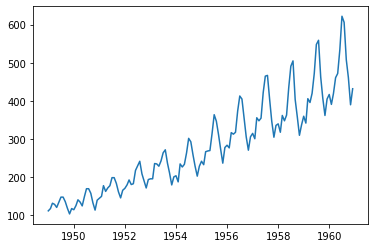

In [35]:
plt.plot(ts)

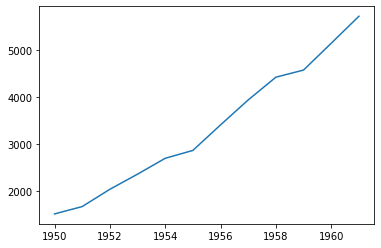

In [27]:
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)




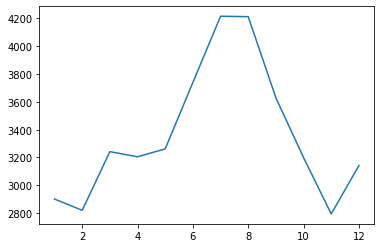

In [28]:
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)



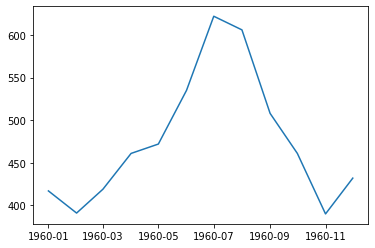

In [29]:
ts_datas = ts['1960-01-01':'1960-12-01']
plt.plot(ts_datas)

# Decomposicao

In [39]:
decomposicao = seasonal_decompose(ts)
tendencia = decomposicao.trend
#print(tendencia)
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

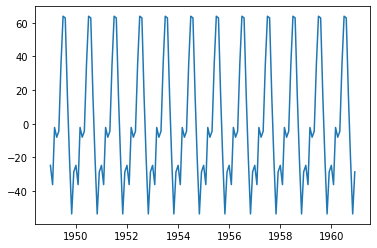

In [40]:
plt.plot(sazonal)

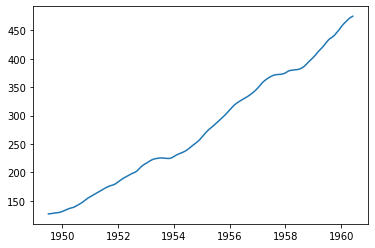

In [41]:
plt.plot(tendencia)

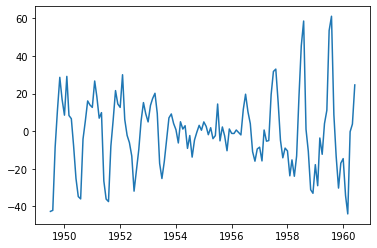

In [42]:
plt.plot(aleatorio)

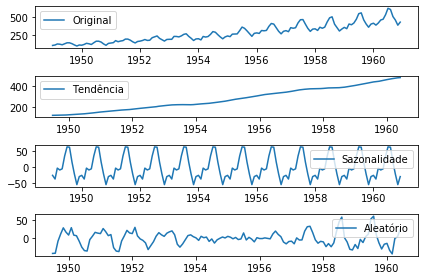

In [45]:
plt.subplot(4,1,1)
plt.plot(ts,label='Original')
plt.legend(loc = 'best')

plt.subplot(4,1,2)
plt.plot(tendencia,label='Tendência')
plt.legend(loc = 'best')

plt.subplot(4,1,3)
plt.plot(sazonal,label='Sazonalidade')
plt.legend(loc = 'best')

plt.subplot(4,1,4)
plt.plot(aleatorio,label='Aleatório')
plt.legend(loc = 'best')

plt.tight_layout()

# Previsoes

In [47]:
ts.mean()

280.2986111111111

In [52]:
#ultimo ano
ts['1960-01-01':'1960-12-01'].mean()

476.1666666666667

In [55]:
#carrega cada mes com a media dos ukltimos 12 meses
media_movel = ts.rolling(window = 12).mean()
print(media_movel)

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: #Passengers, Length: 144, dtype: float64


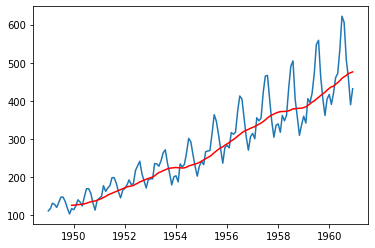

In [56]:
plt.plot(ts)
plt.plot(media_movel,color='red')

In [60]:
# Prever os proximos 12 meses
previsoes =[]
for i in range(1,13):
    superior = len(media_movel)-i
    inferior = superior-11
    nova_media_movel = media_movel[inferior:superior].mean()
    print('De {} até {} - media {}'.format(inferior,superior,nova_media_movel))
    previsoes.append(nova_media_movel)
#ordenar
previsoes = previsoes[::-1]

De 132 até 143 - media 453.52272727272737
De 131 até 142 - media 449.3787878787878
De 130 até 141 - media 444.9318181818181
De 129 até 140 - media 440.49999999999994
De 128 até 139 - media 436.04545454545456
De 127 até 138 - media 431.5
De 126 até 137 - media 427.1060606060606
De 125 até 136 - media 422.75757575757575
De 124 até 135 - media 418.52272727272725
De 123 até 134 - media 414.34848484848493
De 122 até 133 - media 409.90909090909093
De 121 até 132 - media 405.50757575757575


# Arima

In [64]:
modelo = ARIMA(ts,order=(2,1,2))
modelo_treinado = modelo.fit()
modelo_treinado.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.717
Date:                Sat, 25 Apr 2020   AIC                           1344.043
Time:                        16:15:43   BIC                           1361.821
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.931      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.879      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9096      0.065    -29.491      0.000      -2.036      -1.783
ma.L2.D.#Passengers     0.9994      0.068     14.804      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9553           -0.2965j            1.0003           -0.0479
MA.2            0.9553           +0.2965j            1.0003            0.0479
-----------------------------------------------------------------------------
"""

In [65]:
previsoes = modelo_treinado.forecast(steps=12)[0]

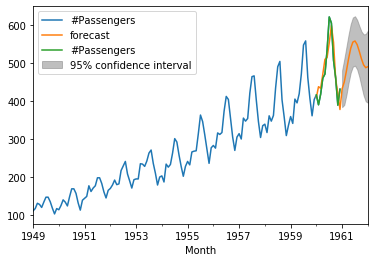

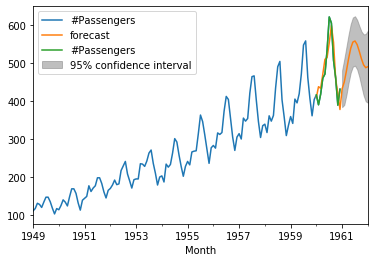

In [70]:
eixo = ts.plot()
modelo_treinado.plot_predict('1960-01-01',
                            '1962-01-01',
                            ax = eixo,
                            plot_insample = True)

# Auto Arima

In [ ]:
#!pip install pyramid-arima

In [ ]:
from pyramid.arima import auto

In [ ]:
modelo_auto = auto_arima(ts, m=12, seasonal=True,trace = True)
modelo_auto.summary()
proximos_12 = modelo_auto.predict(n_periods =12)